In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

## Camera Calibration

In [2]:
cameraCalibration = pickle.load( open('./calibration.p', 'rb' ) )
mtx, dist = map(cameraCalibration.get, ('mtx', 'dist'))

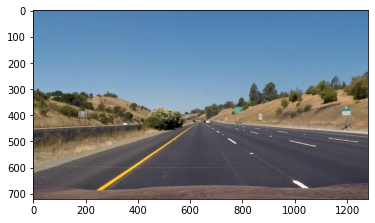

In [3]:
# load a image
image = mpimg.imread('./test_images/straight_lines1.jpg')
plt.imshow(image)

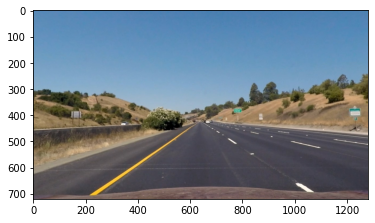

In [4]:
# undistort the image
undistort = cv2.undistort(image, mtx, dist,None,mtx)
plt.imshow(undistort)

## Perspective transform

In [5]:
# mark a rectangle
left_bottom = (190,720)
left_top = (550,480)
right_top = (740,480)
right_bottom = (1150,720)
trapezoid = np.copy(undistort)

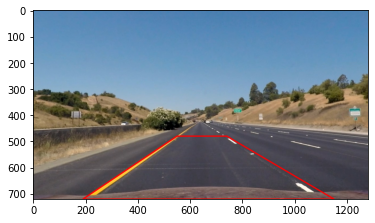

In [6]:
# draw trapezoid on the copy image
cv2.line(trapezoid,left_top,left_bottom,[255,0,0],4)
cv2.line(trapezoid,left_top,right_top,[255,0,0],4)
cv2.line(trapezoid,right_bottom,left_bottom,[255,0,0],4)
cv2.line(trapezoid,right_top,right_bottom,[255,0,0],4)
plt.imshow(trapezoid)

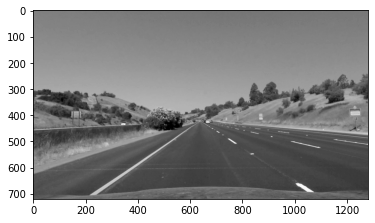

In [7]:
# convert to grayscale
gray = cv2.cvtColor(undistort,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

In [8]:
# Mark dest and src points
offset = 200
img_size = (gray.shape[1],gray.shape[0])

src = np.float32([[left_top,right_top,right_bottom,left_bottom]])
dst = np.float32([
    [offset,0],
    [img_size[0]-offset, 0],
    [img_size[0]-offset, img_size[1]],
    [offset, img_size[1]]
])
# get perspective matrix
M = cv2.getPerspectiveTransform(src,dst)
Minv = cv2.getPerspectiveTransform(dst,src)

In [9]:
# get warped image
warped = cv2.warpPerspective(undistort, M, img_size)

Text(0.5, 1.0, 'Perspective')

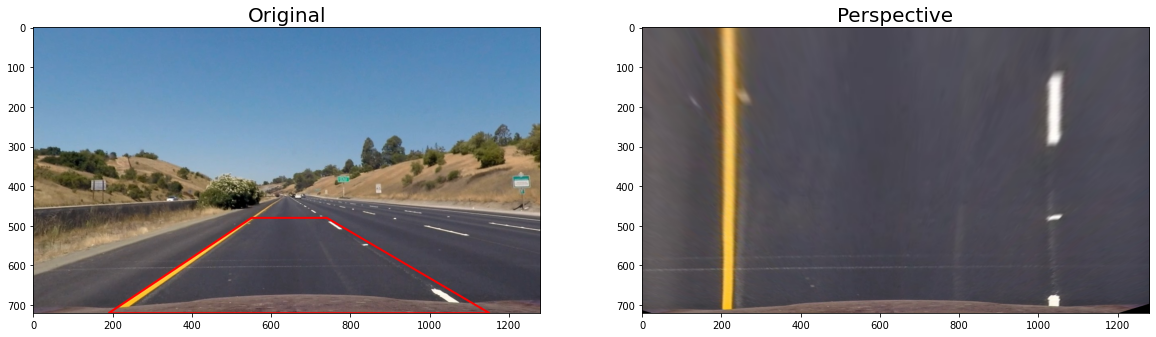

In [10]:
# plot the original and perspective
fix, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,10))
ax1.imshow(trapezoid)
ax1.set_title('Original',fontsize=20)
ax2.imshow(warped)
ax2.set_title('Perspective',fontsize=20)

In [11]:
# dump the matrix 
pickle.dump({'M':M,'Minv':Minv},open('./perspective_transform.p','wb'))

In [12]:
print(M)

[[-6.51851852e-01 -1.45308642e+00  1.02785185e+03]
 [ 3.95432479e-16 -2.13333333e+00  1.02400000e+03]
 [ 2.52128491e-19 -2.37654321e-03  1.00000000e+00]]
